In [1]:
import tikzplotlib
import glob
import os
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [2]:
mean_flow_file_path= '01-mean-flow/'
LEE_path = '02-linearized-euler-equations/'
MMS_path = '03-method-of-manufactured-solutions/'

data_paths = [mean_flow_file_path,LEE_path,MMS_path]

for i in range(len(data_paths)):
    read_files = \
    glob.glob( os.path.join(data_paths[i],'*.dat' ))


In [3]:
flow_data = pd.read_csv(\
                   '01-mean-flow/mean-flow9.dat', \
                   delim_whitespace= True)


In [4]:
LEE_L2_data = pd.read_csv(\
                      '03-method-of-manufactured-solutions/LEE-source-term-L2.dat', \
                      delim_whitespace=True)
LEE_ROC_data = pd.read_csv(\
                      '03-method-of-manufactured-solutions/LEE-source-term-ROC.dat', \
                      delim_whitespace=True)
SND_L2_data = pd.read_csv(\
                      '03-method-of-manufactured-solutions/sound-speed-L2-513.dat', \
                      delim_whitespace=True)
SND_ROC_data = pd.read_csv(\
                      '03-method-of-manufactured-solutions/sound-speed-ROC.dat', \
                      delim_whitespace=True)

In [5]:
Delta_r = LEE_ROC_data.Delta_r
LEE_ROC = LEE_ROC_data.ROC
SND_ROC = SND_ROC_data.ROC

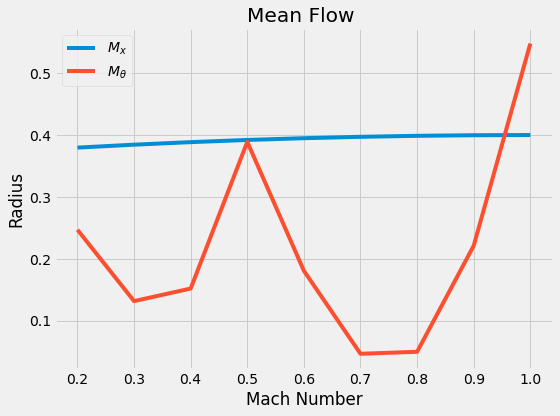

In [6]:
plt.style.use('fivethirtyeight')
# plot data
plt.rcParams["figure.figsize"] = (8,6)
#fig.set_size_inches(8,5)
plt.plot( \
         flow_data['radius'],flow_data['M_x'], \
         label = '$M_{x}$', \
        )
plt.plot(\
         flow_data['radius'],flow_data['M_theta'], \
         label = '$M_{\\theta}$' , \
        )

# add details
plt.legend()
plt.title('Mean Flow ')
plt.xlabel('Mach Number')
plt.ylabel('Radius')
plt.tight_layout()

tikzplotlib.save("plotReport/MachDistribution.tex")

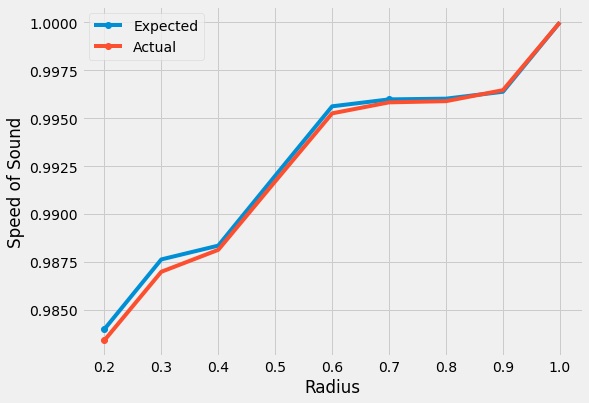

In [7]:
plt.plot(\
         flow_data['radius'],flow_data['A_expected'], \
         label ='Expected' ,\
         marker='o',markevery=5)

plt.plot(\
         flow_data['radius'],flow_data['A_actual'], \
         label ='Actual' ,\
         marker='o',markevery=10)
plt.ylabel('Speed of Sound')
plt.xlabel('Radius')
plt.legend()
tikzplotlib.save("plotReport/SoundSpeedFromIntegration.tex")

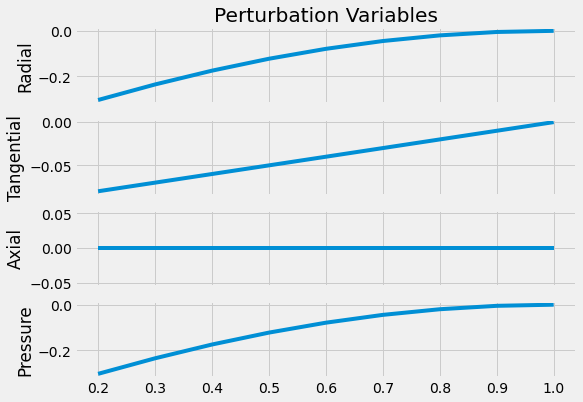

In [8]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,sharex=True)

ax1.set_title('Perturbation Variables')
ax1.plot(\
         flow_data['radius'],flow_data['vR'] \
         )
ax1.set_ylabel('Radial')
ax2.plot(\
         flow_data['radius'],flow_data['vTh'] \
         )
ax2.set_ylabel('Tangential')
ax3.plot(\
         flow_data['radius'],flow_data['vX']\
        )
ax3.set_ylabel('Axial')
ax4.plot(\
         flow_data['radius'],flow_data['Pr']\
        )
ax4.set_ylabel('Pressure')

tikzplotlib.save("plotReport/PerturbationVariables.tex")

Text(0.5, 0, '\\Delta r')

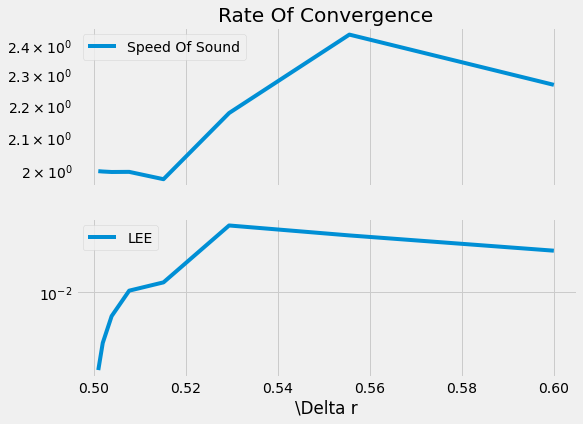

In [9]:
fig, (ax1,ax2) = plt.subplots( \
                      nrows=2, \
                      ncols=1, \
                             sharex=True)
ax1.semilogy(Delta_r,SND_ROC,label='Speed Of Sound')
ax1.legend()
ax1.set_title('Rate Of Convergence')
ax2.semilogy(Delta_r,LEE_ROC,label='LEE')
ax2.legend()
ax2.set_xlabel('\Delta r')


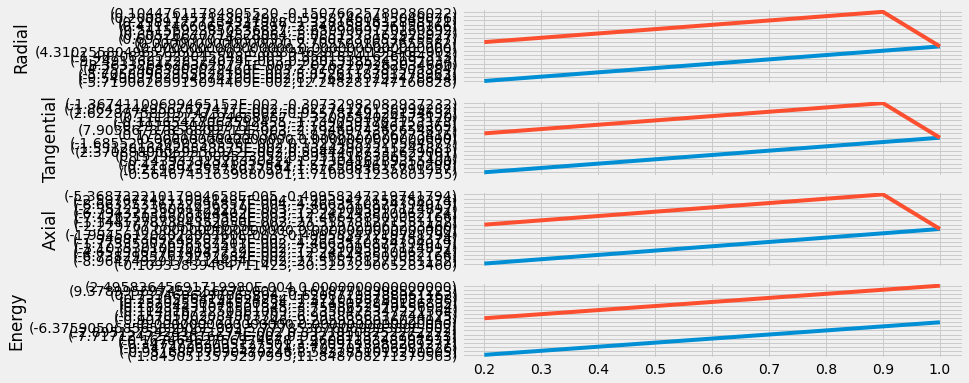

In [10]:
#plt.semilogy(Delta_r,LEE_ROC)
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows =4, ncols=1,sharex=True)
# can i loop though aXes?
ax1.set_ylabel('Radial')
ax1.plot(flow_data['radius'],flow_data['S_1_e'])
ax1.plot(flow_data['radius'],flow_data['S_1_a'])
ax2.set_ylabel('Tangential')
ax2.plot(flow_data['radius'],flow_data['S_2_e'])
ax2.plot(flow_data['radius'],flow_data['S_2_a'])
ax3.set_ylabel('Axial')
ax3.plot(flow_data['radius'],flow_data['S_3_e'])
ax3.plot(flow_data['radius'],flow_data['S_3_a'])
ax4.set_ylabel('Energy')
ax4.plot(flow_data['radius'],flow_data['S_4_e'])
ax4.plot(flow_data['radius'],flow_data['S_4_a'])